Some references:
1. https://saralgyaan.com/posts/python-candlestick-chart-matplotlib-tutorial-chapter-11/
2. https://blog.quantinsti.com/build-technical-indicators-in-python/

In [49]:
import pandas as pd
import numpy as np
import yfinance
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
name = 'SPY'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2022-08-20",end="2023-08-20")

In [3]:
pd.to_datetime(df.index)

DatetimeIndex(['2022-08-22 00:00:00-04:00', '2022-08-23 00:00:00-04:00',
               '2022-08-24 00:00:00-04:00', '2022-08-25 00:00:00-04:00',
               '2022-08-26 00:00:00-04:00', '2022-08-29 00:00:00-04:00',
               '2022-08-30 00:00:00-04:00', '2022-08-31 00:00:00-04:00',
               '2022-09-01 00:00:00-04:00', '2022-09-02 00:00:00-04:00',
               ...
               '2023-08-07 00:00:00-04:00', '2023-08-08 00:00:00-04:00',
               '2023-08-09 00:00:00-04:00', '2023-08-10 00:00:00-04:00',
               '2023-08-11 00:00:00-04:00', '2023-08-14 00:00:00-04:00',
               '2023-08-15 00:00:00-04:00', '2023-08-16 00:00:00-04:00',
               '2023-08-17 00:00:00-04:00', '2023-08-18 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=250, freq=None)

In [4]:
df.columns= df.columns.str.lower()

df['date'] = pd.to_datetime(df.index)
df['date'] = df['date'].apply(mpl_dates.date2num)

df = df.loc[:,['date', 'open', 'high', 'low', 'close','volume']]

In [5]:
supports = df[df.low==df.low.rolling(3, center=True).min()].low
resistances = df[df.high==df.high.rolling(3, center=True).max()].high

supports = supports.iloc[::-1].expanding().min().drop_duplicates().iloc[::-1]
resistances = resistances.iloc[::-1].expanding().max().drop_duplicates().iloc[::-1]

C:\Users\work\AppData\Local\Temp\ipykernel_25144\2501209372.py:29: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\work\AppData\Local\Temp\ipykernel_25144\2501209372.py:42: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\work\AppData\Local\Temp\ipykernel_25144\2501209372.py:56: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\work\AppData\Local\Temp\ipykernel_25144\2501209372.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


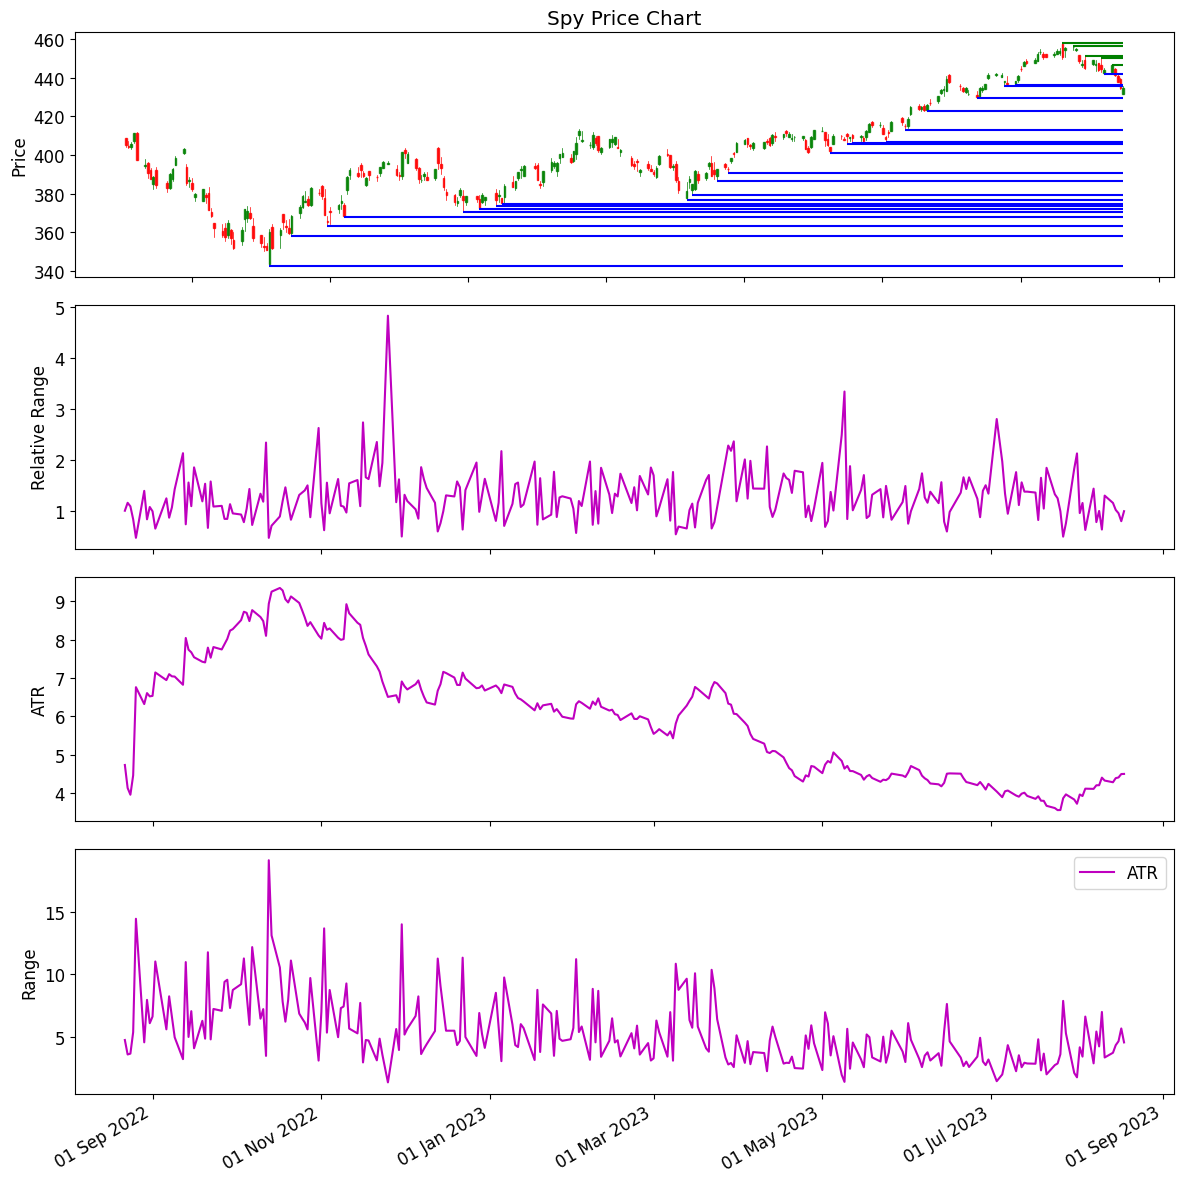

In [65]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rc('font', size=12) 
fig = plt.figure()



# Plot candlesticks
ax = fig.add_subplot(4,1,1)
candlestick_ohlc(ax,df.values,width=0.6, \
                colorup='green', colordown='red', alpha=0.8)
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

for i in range(0,supports.shape[0]):
    ax.hlines(supports[i],xmin=df['date'][df.index==supports.index[i]], xmax=max(df['date']), colors='blue')
for i in range(0,resistances.shape[0]):
    ax.hlines(resistances[i],xmin=df['date'][df.index==resistances.index[i]], xmax=max(df['date']), colors='green')

plt.title('Spy Price Chart')
plt.ylabel('Price')


# Plot Relative Range
bx = fig.add_subplot(4,1,2)
bx.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()
plt.ylabel('Relative Range')

plt.plot(
    atr(df)/np.abs(df['high'] - df['low']),
    'm', 
    label='ATR'
)

# Plot ATR
cx = fig.add_subplot(4,1,3)
cx.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()
plt.ylabel('ATR')

plt.plot(
    atr(df),
    'm', 
    label='ATR'
)


# Plot Range
dx = fig.add_subplot(4,1,4)
dx.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()
plt.ylabel('Range')

plt.plot(
    np.abs(df['high'] - df['low']),
    'm', 
    label='ATR'
)




plt.legend()

plt.tight_layout()
plt.show()

In [38]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14) 

def plot_all():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for i in range(0,supports.shape[0]):
    plt.hlines(supports[i],xmin=df['date'][df.index==supports.index[i]], xmax=max(df['date']), colors='blue')
  for i in range(0,resistances.shape[0]):
    plt.hlines(resistances[i],xmin=df['date'][df.index==resistances.index[i]], xmax=max(df['date']), colors='green')
  fig.show()

C:\Users\work\AppData\Local\Temp\ipykernel_21492\696358214.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


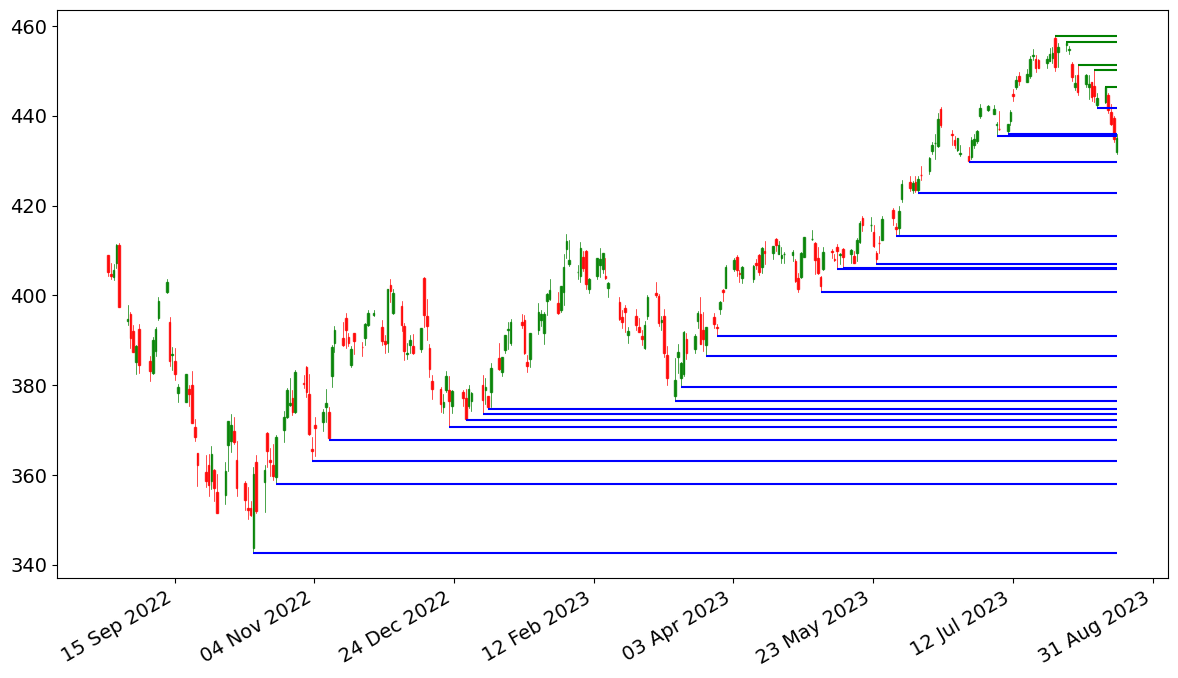

In [39]:
plot_all()

In [44]:
import mplfinance as mpf

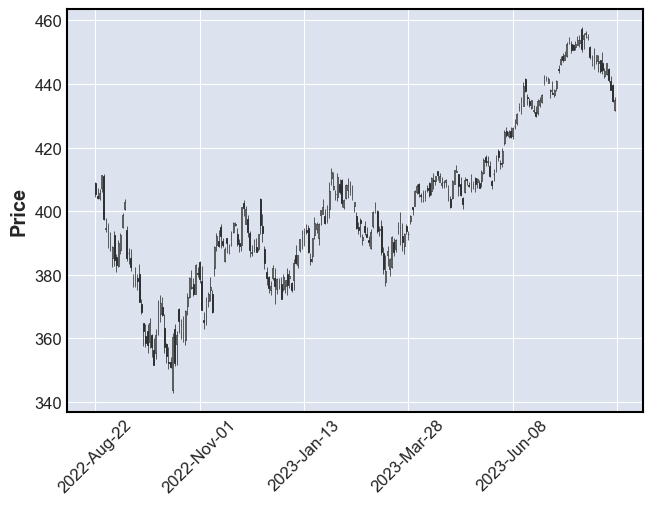

In [46]:
mpf.plot(df,type='candle')

In [42]:
df.\
    assign(
        ATR = lambda dat: atr(dat),
        RANGE = lambda dat: np.abs(dat['high'] - dat['low'])
    )

,date,open,high,low,close,volume,ATR,RANGE
Date,,,,,,,,
2022-08-22 00:00:00-04:00,19226.166667,408.906728,409.083236,404.347529,405.278992,77695600,4.735707,4.735707
2022-08-23 00:00:00-04:00,19227.166667,404.837772,407.308586,403.729831,404.298523,49105200,4.135806,3.578755
2022-08-24 00:00:00-04:00,19228.166667,404.063145,407.004568,403.357233,405.592712,49177800,3.960778,3.647335
2022-08-25 00:00:00-04:00,19229.166667,407.132082,411.367737,406.004542,411.318726,50942300,4.465932,5.363195
2022-08-26 00:00:00-04:00,19230.166667,411.201058,411.759906,397.337140,397.395966,103087000,6.762812,14.422766
...,...,...,...,...,...,...,...,...
2023-08-14 00:00:00-04:00,19583.166667,443.136925,446.534912,442.818042,446.534912,47867400,4.285707,3.716870
2023-08-15 00:00:00-04:00,19584.166667,444.701376,445.070101,440.745330,441.333282,75707500,4.393127,4.324772
2023-08-16 00:00:00-04:00,19585.166667,440.904761,442.618716,437.985067,438.094696,80107200,4.410307,4.633649


In [16]:
def rma(s: pd.Series, period: int) -> pd.Series:
    return s.ewm(alpha=1 / period).mean()

def atr(df: pd.DataFrame, length: int = 14) -> pd.Series:
    # Ref: https://stackoverflow.com/a/74282809/
    high, low, prev_close = df['high'], df['low'], df['close'].shift()
    tr_all = [high - low, high - prev_close, low - prev_close]
    tr_all = [tr.abs() for tr in tr_all]
    tr = pd.concat(tr_all, axis=1).max(axis=1)
    atr_ = rma(tr, length)
    return atr_

In [28]:
df.iloc[-1].Close - df.iloc[-1].Open

3.1190031039499786

In [23]:
np.abs(supports - df.iloc[-1].Close).argmin()

19

In [24]:
np.abs(resistances - df.iloc[-1].Close).argmin()


4

In [26]:
len(resistances)

5